<a href="https://colab.research.google.com/github/Saimon0007/Clustering-Datasets/blob/main/Clustered_hotel_booking_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-Means Clustering**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
url ='https://raw.githubusercontent.com/muajnstu/Large_Scale_Implementation_of_DSK_Chain/refs/heads/main/Cleaned_Data/hotel_booking_processed.csv'
df = pd.read_csv(url)

X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

X_0 = X[y == 0]
X_1 = X[y == 1]

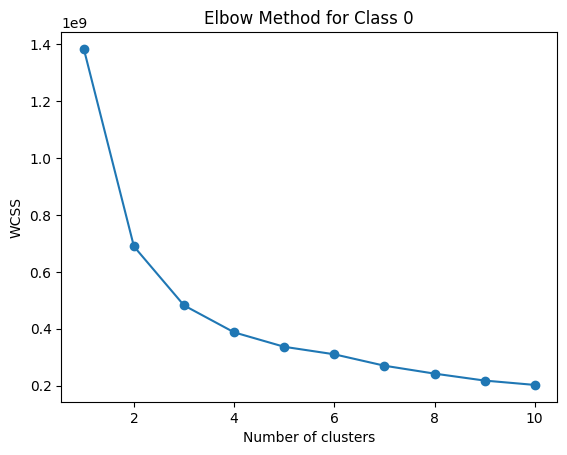

In [ ]:
wcss_0 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_0)
    wcss_0.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_0, marker='o')
plt.title('Elbow Method for Class 0')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

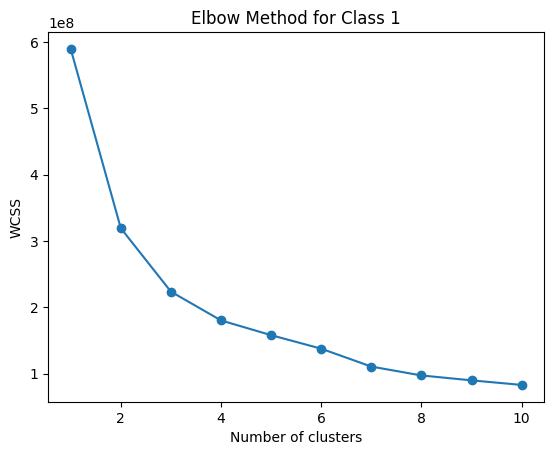

In [ ]:
wcss_1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_1)
    wcss_1.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_1, marker='o')
plt.title('Elbow Method for Class 1')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
n_clusters_0 = 3   # <-- set based on elbow visualization
n_clusters_1 = 3   # <-- set based on elbow visualization

kmeans_0 = KMeans(n_clusters=n_clusters_0, random_state=42)
sub_labels_0 = kmeans_0.fit_predict(X_0)

kmeans_1 = KMeans(n_clusters=n_clusters_1, random_state=42)
sub_labels_1 = kmeans_1.fit_predict(X_1)

In [ ]:
counts_0 = np.bincount(sub_labels_0)
for i, count in enumerate(counts_0):
    print(f"Class 0 - Cluster {i}: {count} samples")

Class 0 - Cluster 0: 34765 samples
Class 0 - Cluster 1: 10754 samples
Class 0 - Cluster 2: 17827 samples


In [ ]:
counts_1 = np.bincount(sub_labels_1)
for i, count in enumerate(counts_1):
    print(f"Class 1 - Cluster {i}: {count} samples")

Class 1 - Cluster 0: 12148 samples
Class 1 - Cluster 1: 4836 samples
Class 1 - Cluster 2: 7040 samples


In [ ]:
df_0 = X_0.copy()
df_0['is_canceled'] = 0
df_0['Cluster_Label'] = sub_labels_0

df_1 = X_1.copy()
df_1['is_canceled'] = 1
df_1['Cluster_Label'] = sub_labels_1

# Combine both datasets
final_df = pd.concat([df_0, df_1], ignore_index=True)

# Create unique cluster identifiers (combine class + subcluster)
final_df['Combined_Cluster'] = final_df['is_canceled'].astype(str) + '_' + final_df['Cluster_Label'].astype(str)

# Map to continuous cluster numbers starting from 0
unique_clusters = sorted(final_df['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Assign new continuous labels
final_df['Cluster_Label'] = final_df['Combined_Cluster'].map(cluster_map)

# Drop helper columns (keep only desired ones)
final_df = final_df.drop(columns=['is_canceled', 'Combined_Cluster'])

# Save to CSV
final_df.to_csv('Clustered Hotel Booking Data.csv', index=False)

DBSCAN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN

In [ ]:
dbscan_0 = DBSCAN(eps=0.5, min_samples=5)
sub_labels_0 = dbscan_0.fit_predict(X_0)

dbscan_1 = DBSCAN(eps=0.5, min_samples=5)
sub_labels_1 = dbscan_1.fit_predict(X_1)

In [ ]:
unique_0, counts_0 = np.unique(sub_labels_0, return_counts=True)
for cluster, count in zip(unique_0, counts_0):
    print(f"Class 0 - Cluster {cluster}: {count} samples")

Class 0 - Cluster -1: 62729 samples
Class 0 - Cluster 0: 9 samples
Class 0 - Cluster 1: 6 samples
Class 0 - Cluster 2: 5 samples
Class 0 - Cluster 3: 5 samples
Class 0 - Cluster 4: 5 samples
Class 0 - Cluster 5: 8 samples
Class 0 - Cluster 6: 9 samples
Class 0 - Cluster 7: 6 samples
Class 0 - Cluster 8: 7 samples
Class 0 - Cluster 9: 5 samples
Class 0 - Cluster 10: 5 samples
Class 0 - Cluster 11: 6 samples
Class 0 - Cluster 12: 5 samples
Class 0 - Cluster 13: 6 samples
Class 0 - Cluster 14: 6 samples
Class 0 - Cluster 15: 6 samples
Class 0 - Cluster 16: 5 samples
Class 0 - Cluster 17: 5 samples
Class 0 - Cluster 18: 5 samples
Class 0 - Cluster 19: 5 samples
Class 0 - Cluster 20: 7 samples
Class 0 - Cluster 21: 6 samples
Class 0 - Cluster 22: 6 samples
Class 0 - Cluster 23: 5 samples
Class 0 - Cluster 24: 5 samples
Class 0 - Cluster 25: 5 samples
Class 0 - Cluster 26: 5 samples
Class 0 - Cluster 27: 5 samples
Class 0 - Cluster 28: 9 samples
Class 0 - Cluster 29: 8 samples
Class 0 - Clus

In [ ]:
unique_1, counts_1 = np.unique(sub_labels_1, return_counts=True)
for cluster, count in zip(unique_1, counts_1):
    print(f"Class 1 - Cluster {cluster}: {count} samples")

Class 1 - Cluster -1: 24013 samples
Class 1 - Cluster 0: 5 samples
Class 1 - Cluster 1: 6 samples


In [ ]:
df_0 = X_0.copy()
df_0['is_canceled'] = 0
df_0['Cluster_Label'] = sub_labels_0

df_1 = X_1.copy()
df_1['is_canceled'] = 1
df_1['Cluster_Label'] = sub_labels_1

# Combine both datasets
final_df = pd.concat([df_0, df_1], ignore_index=True)

# Create unique cluster identifiers (combine class + subcluster)
final_df['Combined_Cluster'] = final_df['is_canceled'].astype(str) + '_' + final_df['Cluster_Label'].astype(str)

# Map to continuous cluster numbers starting from 0
unique_clusters = sorted(final_df['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Assign new continuous labels
final_df['Cluster_Label'] = final_df['Combined_Cluster'].map(cluster_map)

# Drop helper columns (keep only desired ones)
final_df = final_df.drop(columns=['is_canceled', 'Combined_Cluster'])

# Save to CSV
final_df.to_csv('Clustered Hotel Booking Data.csv', index=False)

Hierarchical Clustering (also called Agglomerative Clustering)

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

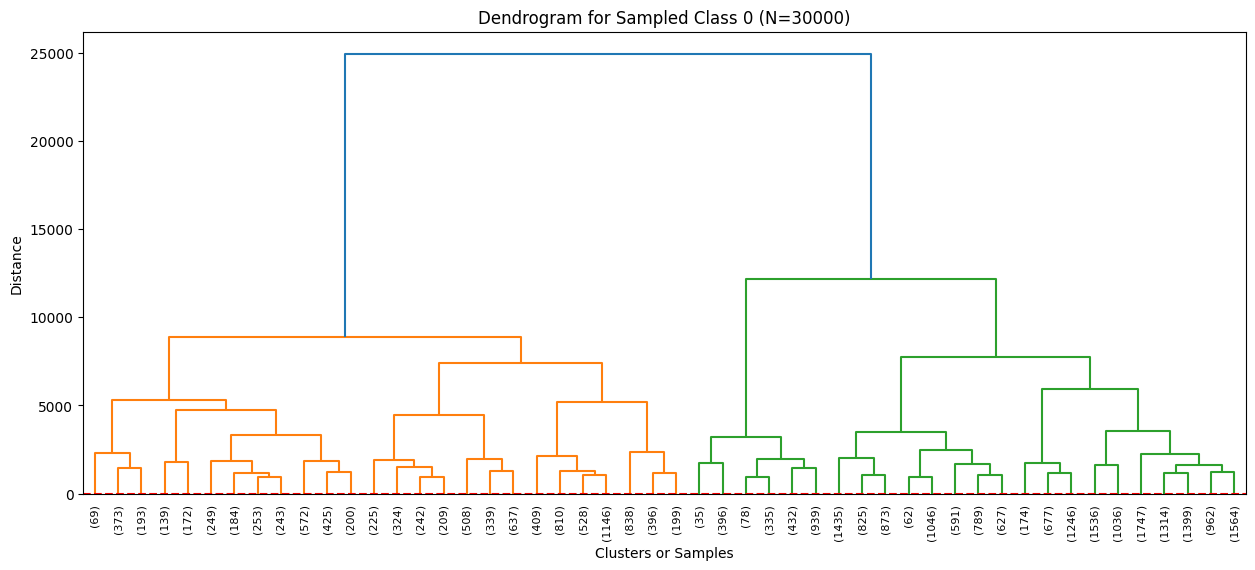

In [ ]:
# Generate linkage matrix for Class 0
# --- Instead of running linkage(X_0, method='ward') on the full X_0 ---

from sklearn.utils import resample
import numpy as np

# 1. Determine a feasible sample size (e.g., 5,000 to 10,000 samples)
SAMPLE_SIZE = 30000

# 2. Sample the data
if X_0.shape[0] > SAMPLE_SIZE:
    # Use resample to get a random subset without replacement
    X_0_sampled = resample(
        X_0,
        replace=False,
        n_samples=SAMPLE_SIZE,
        random_state=42 # for reproducibility
    )
else:
    X_0_sampled = X_0

# 3. Generate linkage matrix on the sample
Z_sampled = linkage(X_0_sampled, method='ward')

# 4. Plot the dendrogram (it will now be much faster and more readable)
plt.figure(figsize=(15, 6)) # Make plot wider for better visibility
# Add a truncate_mode for huge samples
dendrogram(
    Z_sampled,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=50,                   # e.g., show the last 50 clusters
    show_leaf_counts=True
)
plt.title(f"Dendrogram for Sampled Class 0 (N={X_0_sampled.shape[0]})")
plt.xlabel("Clusters or Samples")
plt.ylabel("Distance")
plt.axhline(y=5, color='r', linestyle='--')
plt.show()

In [ ]:
# 1. Use the linkage matrix generated from the sampled data
Z = linkage(X_0_sampled, method='ward')

# 2. Pick a realistic distance threshold t based on the sampled dendrogram
# (You might need to adjust 5 based on your actual plot)
t_distance = 5

# Apply fcluster
cluster_labels = fcluster(Z, t=t_distance, criterion='distance')

n_clusters = len(np.unique(cluster_labels))
print(f"Number of clusters: {n_clusters} (Cut at distance t={t_distance})")

Number of clusters: 22828 (Cut at distance t=5)


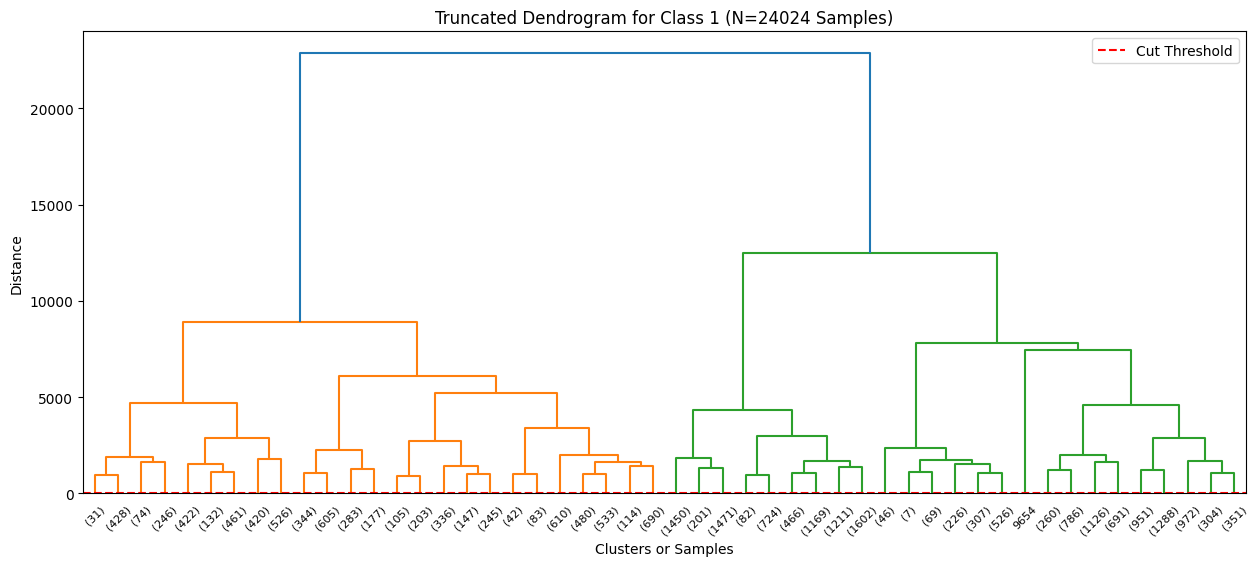

In [ ]:
# --- Setup for Sampling ---
SAMPLE_SIZE = 30000  # Pick a feasible number (e.g., 5k to 10k)

# 1. Sample the data (assuming X_1 is your full, huge dataset)
if X_1.shape[0] > SAMPLE_SIZE:
    X_1_sampled = resample(
        X_1,
        replace=False,
        n_samples=SAMPLE_SIZE,
        random_state=42
    )
else:
    X_1_sampled = X_1

# 2. Generate linkage matrix on the SAMPLE
Z = linkage(X_1_sampled, method='ward')

plt.figure(figsize=(15, 6)) # Use a wider figure for clarity

dendrogram(
    Z,
    truncate_mode='lastp',  # Show only the last 'p' merged clusters
    p=50,                   # e.g., show the 50 largest clusters
    show_leaf_counts=True,
    leaf_rotation=45.
)

# Update the title to reflect the sampling
plt.title(f"Truncated Dendrogram for Class 1 (N={X_1_sampled.shape[0]} Samples)")
plt.xlabel("Clusters or Samples")
plt.ylabel("Distance")

# You might need to adjust this 'y' value based on the new, sampled distances
plt.axhline(y=5, color='r', linestyle='--', label='Cut Threshold')
plt.legend()
plt.show()

In [ ]:
Z = linkage(X_1_sampled, method='ward')

# 2. Pick a realistic distance threshold t based on the sampled dendrogram
# (You might need to adjust 5 based on your actual plot)
t_distance = 5

# Apply fcluster
cluster_labels = fcluster(Z, t=t_distance, criterion='distance')

n_clusters = len(np.unique(cluster_labels))
print(f"Number of clusters: {n_clusters} (Cut at distance t={t_distance})")

Number of clusters: 18674 (Cut at distance t=5)


or

In [ ]:
hc_0 = AgglomerativeClustering(n_clusters=2, linkage='ward')
sub_labels_0 = hc_0.fit_predict(X_0_sampled)

hc_1 = AgglomerativeClustering(n_clusters=2, linkage='ward')
sub_labels_1 = hc_1.fit_predict(X_1_sampled)

In [ ]:
counts_0 = np.bincount(sub_labels_0)
for i, count in enumerate(counts_0):
    print(f"Class 0 - Cluster {i}: {count} samples")

counts_1 = np.bincount(sub_labels_1)
for i, count in enumerate(counts_1):
    print(f"Class 1 - Cluster {i}: {count} samples")

Class 0 - Cluster 0: 20118 samples
Class 0 - Cluster 1: 9882 samples
Class 1 - Cluster 0: 16287 samples
Class 1 - Cluster 1: 7737 samples


In [ ]:
df_0 = X_0_sampled.copy()
df_0['is_canceled'] = 0
df_0['Cluster_Label'] = sub_labels_0

df_1 = X_1_sampled.copy()
df_1['is_canceled'] = 1
df_1['Cluster_Label'] = sub_labels_1

# Combine both datasets
final_df = pd.concat([df_0, df_1], ignore_index=True)

# Create unique cluster identifiers (combine class + subcluster)
final_df['Combined_Cluster'] = final_df['is_canceled'].astype(str) + '_' + final_df['Cluster_Label'].astype(str)

# Map to continuous cluster numbers starting from 0
unique_clusters = sorted(final_df['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Assign new continuous labels
final_df['Cluster_Label'] = final_df['Combined_Cluster'].map(cluster_map)

# Drop helper columns (keep only desired ones)
final_df = final_df.drop(columns=['is_canceled', 'Combined_Cluster'])

# Save to CSV
final_df.to_csv('Clustered Hotel Booking Data.csv', index=False)

In [ ]:
df_0 = X_0_sampled.copy()
df_0['is_canceled'] = 0
df_0['Cluster_Label'] = sub_labels_0

df_1 = X_1_sampled.copy()
df_1['is_canceled'] = 1
df_1['Cluster_Label'] = sub_labels_1

# Combine both datasets
final_df = pd.concat([df_0, df_1], ignore_index=True)

# Create unique cluster identifiers (combine class + subcluster)
final_df['Combined_Cluster'] = final_df['is_canceled'].astype(str) + '_' + final_df['Cluster_Label'].astype(str)

# Map to continuous cluster numbers starting from 0
unique_clusters = sorted(final_df['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Assign new continuous labels
final_df['Cluster_Label'] = final_df['Combined_Cluster'].map(cluster_map)

# Drop helper columns (keep only desired ones)
final_df = final_df.drop(columns=['is_canceled', 'Combined_Cluster'])

# Save to CSV
final_df.to_csv('Clustered Hotel Booking Data.csv', index=False)

**Spectral Clustering**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

In [ ]:
def run_spectral_clustering(X_data, class_label, n_neighbors=10):
    best_score = -1
    best_k = None
    best_labels = None

    # Search for the best number of clusters
    for k in range(2, 7):
        sc = SpectralClustering(
            n_clusters=k,
            affinity='nearest_neighbors',
            n_neighbors=n_neighbors, # Pass n_neighbors here
            assign_labels='kmeans',
            random_state=42
        )
        labels = sc.fit_predict(X_data)
        # Only calculate silhouette score if there is more than 1 cluster and not all samples are noise (-1)
        if len(np.unique(labels)) > 1 and -1 not in labels:
            score = silhouette_score(X_data, labels)
            print(f"Class {class_label} | n_clusters={k}, Silhouette Score={score:.4f}")

            if score > best_score:
                best_score = score
                best_k = k
                best_labels = labels
        else:
            print(f"Class {class_label} | n_clusters={k}, Silhouette Score=N/A (single cluster or all noise)")

    if best_k is not None:
        print(f"Best n_clusters for Class {class_label}: {best_k} (Silhouette Score={best_score:.4f})")
    else:
        print(f"Could not find suitable clusters for Class {class_label} with current settings.")

    return best_labels, best_k, best_score

In [ ]:
# ---- Run Spectral Clustering with automatic k selection and increased n_neighbors ----
# Increase n_neighbors to try and connect the graph more effectively
# You might need to experiment with this value (e.g., 10, 20, 50)
sub_labels_0, best_k_0, best_score_0 = run_spectral_clustering(X_0, class_label=0, n_neighbors=20)
sub_labels_1, best_k_1, best_score_1 = run_spectral_clustering(X_1, class_label=1, n_neighbors=20)

Class 0 | n_clusters=2, Silhouette Score=0.5199
Class 0 | n_clusters=3, Silhouette Score=0.4525
Class 0 | n_clusters=4, Silhouette Score=0.4185
Class 0 | n_clusters=5, Silhouette Score=0.2485
Class 0 | n_clusters=6, Silhouette Score=0.2707
Best n_clusters for Class 0: 2 (Silhouette Score=0.5199)
Class 1 | n_clusters=2, Silhouette Score=0.5188
Class 1 | n_clusters=3, Silhouette Score=0.4537
Class 1 | n_clusters=4, Silhouette Score=0.4428
Class 1 | n_clusters=5, Silhouette Score=0.4351
Class 1 | n_clusters=6, Silhouette Score=0.4077
Best n_clusters for Class 1: 2 (Silhouette Score=0.5188)


In [ ]:
# Show cluster counts
counts_0 = np.bincount(sub_labels_0)
for i, count in enumerate(counts_0):
    print(f"Class 0 - Cluster {i}: {count} samples")

counts_1 = np.bincount(sub_labels_1)
for i, count in enumerate(counts_1):
    print(f"Class 1 - Cluster {i}: {count} samples")

Class 0 - Cluster 0: 47135 samples
Class 0 - Cluster 1: 16211 samples
Class 1 - Cluster 0: 16884 samples
Class 1 - Cluster 1: 7140 samples


In [ ]:
df_0 = X_0.copy()
df_0['is_canceled'] = 0
df_0['Cluster_Label'] = sub_labels_0

df_1 = X_1.copy()
df_1['is_canceled'] = 1
df_1['Cluster_Label'] = sub_labels_1

# Combine both datasets
final_df = pd.concat([df_0, df_1], ignore_index=True)

# Create unique cluster identifiers (combine class + subcluster)
final_df['Combined_Cluster'] = final_df['is_canceled'].astype(str) + '_' + final_df['Cluster_Label'].astype(str)

# Map to continuous cluster numbers starting from 0
unique_clusters = sorted(final_df['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Assign new continuous labels
final_df['Cluster_Label'] = final_df['Combined_Cluster'].map(cluster_map)

# Drop helper columns (keep only desired ones)
final_df = final_df.drop(columns=['is_canceled', 'Combined_Cluster'])

# Save to CSV
final_df.to_csv('Clustered Hotel Booking Data.csv', index=False)

Min batch k-means

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans

In [ ]:
n_clusters_0 = 3
mbk_0 = MiniBatchKMeans(
    n_clusters=n_clusters_0,
    random_state=42,
    batch_size=256,
    max_iter=100
)
sub_labels_0 = mbk_0.fit_predict(X_0)

n_clusters_1 = 3
mbk_1 = MiniBatchKMeans(
    n_clusters=n_clusters_1,
    random_state=42,
    batch_size=256,
    max_iter=100
)
sub_labels_1 = mbk_1.fit_predict(X_1)

In [ ]:
counts_0 = np.bincount(sub_labels_0)
for i, count in enumerate(counts_0):
    print(f"Class 0 - Cluster {i}: {count} samples")

counts_1 = np.bincount(sub_labels_1)
for i, count in enumerate(counts_1):
    print(f"Class 1 - Cluster {i}: {count} samples")

Class 0 - Cluster 0: 17541 samples
Class 0 - Cluster 1: 36228 samples
Class 0 - Cluster 2: 9577 samples
Class 1 - Cluster 0: 13595 samples
Class 1 - Cluster 1: 4086 samples
Class 1 - Cluster 2: 6343 samples


In [ ]:
df_0 = X_0.copy()
df_0['is_canceled'] = 0
df_0['Cluster_Label'] = sub_labels_0

df_1 = X_1.copy()
df_1['is_canceled'] = 1
df_1['Cluster_Label'] = sub_labels_1

# Combine both datasets
final_df = pd.concat([df_0, df_1], ignore_index=True)

# Create unique cluster identifiers (combine class + subcluster)
final_df['Combined_Cluster'] = final_df['is_canceled'].astype(str) + '_' + final_df['Cluster_Label'].astype(str)

# Map to continuous cluster numbers starting from 0
unique_clusters = sorted(final_df['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Assign new continuous labels
final_df['Cluster_Label'] = final_df['Combined_Cluster'].map(cluster_map)

# Drop helper columns (keep only desired ones)
final_df = final_df.drop(columns=['is_canceled', 'Combined_Cluster'])

# Save to CSV
final_df.to_csv('Clustered Hotel Booking Data.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans

# Construct the DataFrame with 'is_canceled' and 'Cluster_Label'
# Using X_0, X_1, sub_labels_0, and sub_labels_1 from the most recent MiniBatchKMeans execution
df_0_temp = X_0.copy()
df_0_temp['is_canceled'] = 0
df_0_temp['Cluster_Label'] = sub_labels_0

df_1_temp = X_1.copy()
df_1_temp['is_canceled'] = 1
df_1_temp['Cluster_Label'] = sub_labels_1

df = pd.concat([df_0_temp, df_1_temp], ignore_index=True)

# ---- Step 1: Extract the clusters you want to recluster ----
to_recluster = df[
    ((df['is_canceled'] == 0) & (df['Cluster_Label'].isin([0, 1]))) |
    ((df['is_canceled'] == 1) & (df['Cluster_Label'] == 0))
].copy()

X_re = to_recluster.drop(['is_canceled', 'Cluster_Label'], axis=1)

# ---- Step 2: Decide how many subclusters you want ----
# Example: recluster into 4 new groups (tune as needed)
n_new_clusters = 4

# ---- Step 3: Apply MiniBatch KMeans again ----
re_kmeans = MiniBatchKMeans(n_clusters=n_new_clusters, random_state=42, batch_size=1024)
to_recluster['sub_cluster'] = re_kmeans.fit_predict(X_re)

# ---- Step 4: Reassign new cluster labels globally ----
# Make new cluster labels unique by offsetting from current max
offset = df['Cluster_Label'].max() + 1
to_recluster['Cluster_Label'] = to_recluster['sub_cluster'] + offset

# ---- Step 5: Merge reclustered samples back ----
df_updated = df.copy()
df_updated.loc[to_recluster.index, 'Cluster_Label'] = to_recluster['Cluster_Label']

# ---- Step 6: Check new distribution ----
print(df_updated.groupby(['is_canceled', 'Cluster_Label']).size())

is_canceled  Cluster_Label
0            2                 9577
             3                 3605
             4                36100
             5                 9794
             6                 4270
1            1                 4086
             2                 6343
             3                    1
             4                13560
             5                   34
dtype: int64


In [ ]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans

# Assume df has columns: 'is_canceled', 'Cluster_Label', and features
X = df.drop(['is_canceled', 'Cluster_Label'], axis=1)

# ---- Step 1: Select clusters to recluster ----
# Based on previous MiniBatchKMeans output (cell 4p8qDTcT4iP0):
# Class 0 - Cluster 0: 17541 samples
# Class 0 - Cluster 1: 36228 samples  <-- Choose this one
# Class 0 - Cluster 2: 9577 samples
# Class 1 - Cluster 0: 13595 samples  <-- Choose this one
# Class 1 - Cluster 1: 4086 samples
# Class 1 - Cluster 2: 6343 samples
targets = [
    (0, 1),  # class 0, cluster 1 (largest)
    (1, 0)   # class 1, cluster 0 (largest)
]

# ---- Step 2: Recluster each target cluster separately ----
df_updated = df.copy()
offset = df['Cluster_Label'].max() + 1  # to make new labels unique

for cls, clus in targets:
    mask = (df['is_canceled'] == cls) & (df['Cluster_Label'] == clus)
    subset = df.loc[mask]
    X_sub = subset.drop(['is_canceled', 'Cluster_Label'], axis=1)

    # Decide the number of new clusters — example: 3 for class 0 large, 2 for class 1 large
    # Ensuring n_new is at least 1, though with a non-empty subset it usually won't be an issue
    n_new = 3 if cls == 0 else 2

    # Recluster
    re_kmeans = MiniBatchKMeans(n_clusters=n_new, random_state=42, batch_size=1024)
    new_labels = re_kmeans.fit_predict(X_sub)

    # Assign new unique cluster labels
    df_updated.loc[mask, 'Cluster_Label'] = new_labels + offset
    offset += n_new

# ---- Step 3: Check new distribution ----
print(df_updated.groupby(['is_canceled', 'Cluster_Label']).size())

is_canceled  Cluster_Label
0            0                17541
             2                 9577
             3                 9294
             4                 9531
             5                17403
1            1                 4086
             2                 6343
             6                 7904
             7                 5691
dtype: int64


In [ ]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans

# IMPORTANT: Use the 'df_updated' from the *previous* reclustering step as the base DataFrame
# This ensures we are reclustering from the currently available cluster labels.
df_current = df_updated.copy() # Make a copy to avoid modifying in place unintentionally

# ---- Step 1: Select clusters to recluster ----
# Based on the latest output provided by the user
targets = [
    (0, 0),  # is_canceled=0, Cluster_Label=0 (17541 samples)
    (0, 5)   # is_canceled=0, Cluster_Label=5 (17403 samples)
]

df_next_updated = df_current.copy()
# Get the maximum Cluster_Label currently present to ensure new labels are unique
current_max_label = df_current['Cluster_Label'].max()
if pd.isna(current_max_label):
    offset = 0
else:
    offset = int(current_max_label) + 1


# ---- Step 2: Loop through each target and recluster ----
for cls, clus in targets:
    mask = (df_current['is_canceled'] == cls) & (df_current['Cluster_Label'] == clus)
    subset = df_current.loc[mask]

    X_sub = subset.drop(['is_canceled', 'Cluster_Label'], axis=1)

    # Check if the subset is empty before clustering
    if X_sub.empty:
        print(f"Warning: Skipping reclustering for (is_canceled={cls}, Cluster_Label={clus}) because no samples were found.")
        continue

    # Decide the number of new clusters (you can adjust this)
    n_new = 3  # Example: split each selected cluster into 3 smaller groups

    re_kmeans = MiniBatchKMeans(n_clusters=n_new, random_state=42, batch_size=1024, n_init='auto')
    new_labels = re_kmeans.fit_predict(X_sub)

    # Assign unique new cluster labels
    df_next_updated.loc[mask, 'Cluster_Label'] = new_labels + offset
    offset += n_new

# ---- Step 3: Check the new distribution ----
print(df_next_updated.groupby(['is_canceled', 'Cluster_Label']).size())

# Update df_updated to reflect the results of this reclustering step
df_updated = df_next_updated

is_canceled  Cluster_Label
0            2                9577
             3                9294
             4                9531
             8                4010
             9                4777
             10               8754
             11               7654
             12               3307
             13               6442
1            1                4086
             2                6343
             6                7904
             7                5691
dtype: int64


In [ ]:
# Use the df_updated DataFrame which contains all the latest reclustering results
final_df_to_save = df_updated.copy()

# Create unique cluster identifiers (combine class + subcluster)
# Note: df_updated already has 'is_canceled' and 'Cluster_Label' with the correct new labels
final_df_to_save['Combined_Cluster'] = final_df_to_save['is_canceled'].astype(str) + '_' + final_df_to_save['Cluster_Label'].astype(str)

# Map to continuous cluster numbers starting from 0 (optional, if you want consecutive labels)
unique_clusters = sorted(final_df_to_save['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Assign new continuous labels
final_df_to_save['Cluster_Label'] = final_df_to_save['Combined_Cluster'].map(cluster_map)

# Drop helper columns (keep only desired ones)
final_df_to_save = final_df_to_save.drop(columns=['is_canceled', 'Combined_Cluster'])

# Save to CSV
final_df_to_save.to_csv('Clustered Hotel Booking Data.csv', index=False)
print("Latest reclustered data saved to 'Clustered Hotel Booking Data.csv'")

Latest reclustered data saved to 'Clustered Hotel Booking Data.csv'
